In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [78]:
train_df = pd.read_csv("/content/drive/My Drive/Deep Learning/train.csv")

In [79]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


1
0
1
4
0
0
7
3


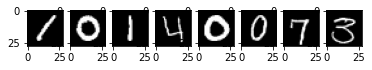

In [80]:
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(train_df.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    print(train_df.iloc[i, 0])

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
class MNIST_dataset(Dataset):
    def __init__(self, df, rows=42000):
        self.imgnp = df.iloc[:rows, 1:].values
        self.labels = df.iloc[:rows, 0].values
        self.rows = rows
    
    def __len__(self):
        return self.rows
    
    def __getitem__(self, idx):
        image = torch.tensor(self.imgnp[idx], dtype=torch.float) / 255  # Normalize
        image = image.view(1, 28, 28)  # (channel, height, width)
        label = self.labels[idx]
        return (image, label)

In [31]:
# transforms to apply to the data
from torchvision import transforms
import torchvision
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [82]:
trainloader = DataLoader(MNIST_dataset(train_df, 42000), batch_size=4, shuffle=True)

In [83]:
dataiter = iter(trainloader)

In [84]:
images, labels = dataiter.next()

In [85]:
images.size(), labels.size()

(torch.Size([4, 1, 28, 28]), torch.Size([4]))

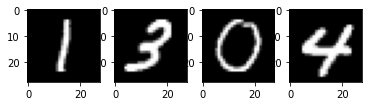

In [86]:
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i, 0], cmap='gray')

In [87]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [88]:
net = Net()

In [89]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [90]:
running_loss_list = []
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 800 == 799:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 800)
                 )
            running_loss_list.append(running_loss)
            running_loss = 0.0
print('Finished Training')

[1,   800] loss: 1.144
[1,  1600] loss: 0.415
[1,  2400] loss: 0.323
[1,  3200] loss: 0.263
[1,  4000] loss: 0.299
[1,  4800] loss: 0.249
[1,  5600] loss: 0.345
[1,  6400] loss: 0.322
[1,  7200] loss: 0.221
[1,  8000] loss: 0.324
[1,  8800] loss: 0.241
[1,  9600] loss: 0.199
[1, 10400] loss: 0.196
[2,   800] loss: 0.376
[2,  1600] loss: 0.289
[2,  2400] loss: 0.282
[2,  3200] loss: 0.208
[2,  4000] loss: 0.224
[2,  4800] loss: 0.302
[2,  5600] loss: 0.229
[2,  6400] loss: 0.300
[2,  7200] loss: 0.276
[2,  8000] loss: 0.253
[2,  8800] loss: 0.212
[2,  9600] loss: 0.213
[2, 10400] loss: 0.246
Finished Training


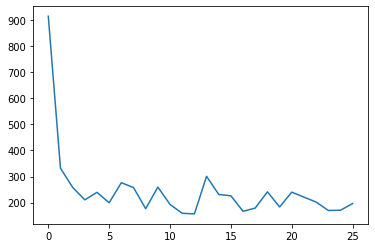

In [91]:
plt.plot(running_loss_list)

In [93]:
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

running_loss_list = []
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 200)
                 )
            running_loss_list.append(running_loss)
            running_loss = 0.0
print('Finished Training')

[1,   200] loss: 2.299
[1,   400] loss: 2.292
[1,   600] loss: 2.281
[1,   800] loss: 2.244
[1,  1000] loss: 1.958
[1,  1200] loss: 1.109
[1,  1400] loss: 0.795
[1,  1600] loss: 0.584
[1,  1800] loss: 0.528
[1,  2000] loss: 0.405
[1,  2200] loss: 0.430
[1,  2400] loss: 0.336
[1,  2600] loss: 0.276
[1,  2800] loss: 0.287
[1,  3000] loss: 0.284
[1,  3200] loss: 0.294
[1,  3400] loss: 0.212
[1,  3600] loss: 0.245
[1,  3800] loss: 0.254
[1,  4000] loss: 0.225
[1,  4200] loss: 0.224
[1,  4400] loss: 0.240
[1,  4600] loss: 0.180
[1,  4800] loss: 0.192
[1,  5000] loss: 0.184
[1,  5200] loss: 0.142
[1,  5400] loss: 0.156
[1,  5600] loss: 0.173
[1,  5800] loss: 0.181
[1,  6000] loss: 0.151
[1,  6200] loss: 0.139
[1,  6400] loss: 0.150
[1,  6600] loss: 0.159
[1,  6800] loss: 0.126
[1,  7000] loss: 0.111
[1,  7200] loss: 0.091
[1,  7400] loss: 0.130
[1,  7600] loss: 0.119
[1,  7800] loss: 0.153
[1,  8000] loss: 0.119
[1,  8200] loss: 0.131
[1,  8400] loss: 0.126
[1,  8600] loss: 0.112
[1,  8800] 

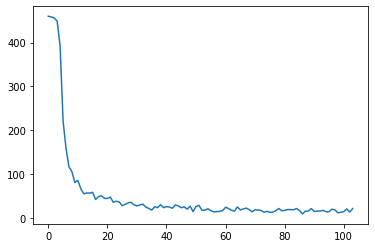

In [94]:
plt.plot(running_loss_list)

In [95]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on train images: ', correct/total)

Accuracy of the network on train images:  0.9833809523809524
